# La desigualdad de [Chebyshev](https://medium.com/analytics-vidhya/illustration-with-python-chebyshevs-inequality-b34be151c547)

La desigualdad de Chebyshev es un teorema extremadamente útil cuando se combina con otros teoremas y es la base del intervalo de confianza. En este blog, ilustraré el teorema y cómo funciona usando Python.

Antes de empezar a codificar, veamos el teorema. La desigualdad de Chebyshev establece que, para una amplia clase de distribución de probabilidad, no más de una cierta cantidad de valores puede estar a más de una cierta distancia de la media, con la fórmula siguiente.

![](https://miro.medium.com/max/321/1*DJqMc1N7D9zgMdR78tr8Fw.jpeg)

Donde X es una variable aleatoria, μ es un valor esperado de X, σ es una desviación estándar de X y k > 0 (un valor constante).

Por ejemplo, la probabilidad de que la distancia al valor esperado sea mayor de 3 desviaciones estándar es menor o igual que uno sobre nueve.

![](https://miro.medium.com/max/335/1*QjRmtedHI3pQjGmfsjEtWg.jpeg)

Según las formulas antereiores, si k aumenta, la probabilidad disminuirá. Ilustraré el teorema usando Python, pero no lo usaré para la fórmula, sino que usaré Python para crear una población y mostrar cómo funciona el teorema.



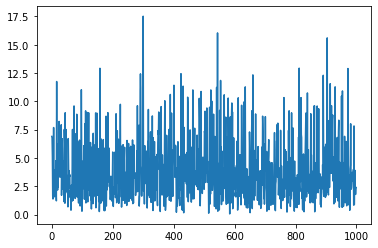

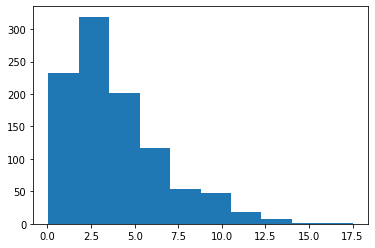

In [ ]:
# Primer paso: Cree una población de 1000 de valores, yo uso una distribución gamma 
# con shape = 2 y scale = 2.
# Notar que el teorema también funciona con otra distribución, como la distribución uniforme.

import numpy as np 
# help(np.random.gamma)

shape,scale = 2,2
mu = shape/scale 
sigma = shape/scale**2

# Generamos una muestra aleatoria de una distribucion gamma
s = np.random.gamma(shape, scale , 1000)
# print(s)

import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(s)
plt.figure(2)
plt.hist(s)
plt.show()

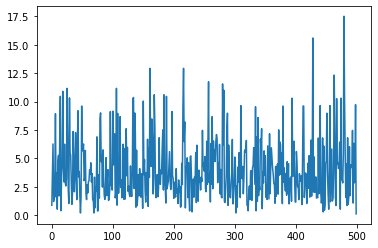

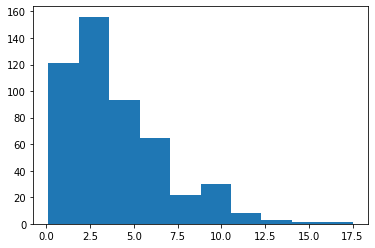

In [ ]:
# 2do paso : tomemos una muestra de 500 valores
import random
rs = random.choices(s, k = 500)

plt.figure(1)
plt.plot(rs)
plt.figure(2)
plt.hist(rs)
plt.show()


In [ ]:
# 3er Paso : Cuente la muestra que tiene una distancia del valor esperado mayor que k desviación estándar 
# y use el conteo para calcular las probabilidades. Quiero representar una tendencia de probabilidades cuando
# k aumenta, por lo que uso un rango de k de 0.1 a 3.

# seteemos los valores de k 
ks = [0.1, 0.5, 1.0, 1.5,2.0, 2.5, 3.0]

# Creamos una lista para almacenar las probabilidades de la desigualdad de chebyshev
probs = []

for k in ks:
  # contamos en c
  c = 0 
  # para cada muestra (k es diferentes)
  for i in rs:
    if abs(i - mu) > k*sigma:
      c = c+1
  probs.append(c/500)

print("Probabilidades calculadas")
print(probs)





Probabilidades calculadas
[0.984, 0.928, 0.876, 0.774, 0.724, 0.686, 0.658]


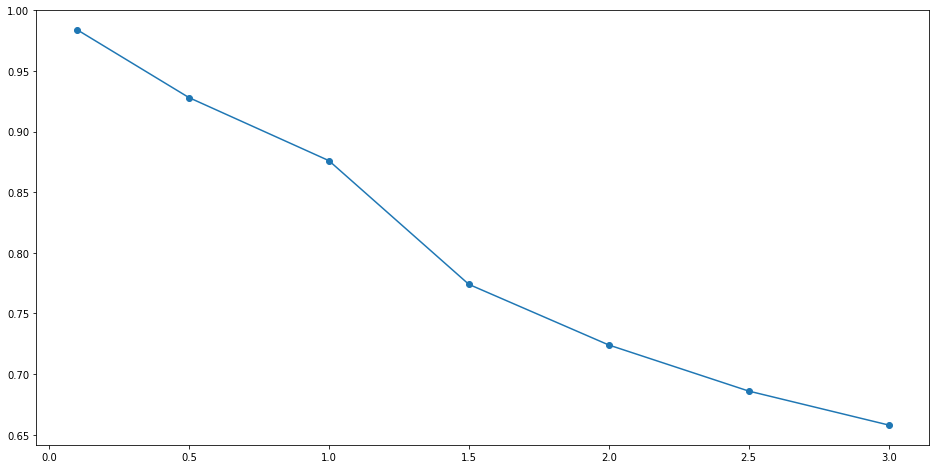

In [ ]:
# 4to paso : Graficamos e imprimimos el resultado 
import matplotlib.pyplot as plt

plt.figure(figsize = (16,8))
plt.plot(ks , probs , marker = 'o')
plt.show()

A partir de la gráfica y el resultado, podemos ver que a medida que aumenta k, la probabilidad disminuye y la probabilidad de cada k sigue a la desigualdad. Además, solo es útil el caso de que k sea mayor que 1. Si k es menor que 1, el lado derecho de la desigualdad es mayor que 1, lo cual no es útil porque la probabilidad no puede ser mayor que 1.

Podemos usar la desigualdad de Chebyshev en muchas aplicaciones, podemos estimar una probabilidad de que los datos caigan en un rango de k desviaciones estándar. Por ejemplo, existe un 90% de probabilidad de que la siguiente muestra esté dentro de un rango de 3 desviaciones estándar.

# Ley debil de los grandes numeros

La ley débil de los grandes numeros establece que con un número suficientemente mayor de ensayos hay una probabilidad muy alta de que la media de observación se acerque al valor esperado. En otras palabras, a medida que el número de ensayos llega al infinito, la media de la observación converge a un valor esperado con una probabilidad muy alta.

![](https://miro.medium.com/max/379/1*D8IJGKIDItwMUYZ7eL_lCQ.jpeg)

Donde Xn es la media de n ensayos, μ es un valor esperado, ε es un margen de error mayor que 0. El detalle completo del teorema se puede encontrar en la [wikipedia](https://en.wikipedia.org/wiki/Law_of_large_numbers)

In [ ]:
# paso 1 : Cree una distribución gamma con shape = 2 y scale = 2 como población.
shape , scale = 2.0, 2.0
s = np.random.gamma(shape, scale , 1000000)

s.shape

(1000000,)

In [ ]:
# paso 2 : Establezca un tamaño de muestra en 100 al principio, muestree 50 veces y obtenga una media de cada vez,
# luego aumente el tamaño de la muestra en 500, repita estos pasos hasta que el tamaño de la muestra alcance los 8100.
samplemeanlist = []  # almacenamos las medias 

numeroMuestreos = 50 # para cada muestra 100, 600, 1100,  .... 8100

l = [] # cada una de las muestras de tamaños : 100, 600, 1100,  .... 8100
for i in range(100,8101,500):
  l.append(i)
  ml = []
  # Muestrear 50 veces 
  for n in range(0,numeroMuestreos):
    rs = random.choices(s, k = i )
    ml.append(sum(rs)/i)
  samplemeanlist.append(ml)

print("Lista de medias de las muestras (diferente tamaño)")
print(samplemeanlist)


Lista de medias de las muestras (diferente tamaño)
[[4.090877744500847, 4.21357084907473, 4.193496034501161, 3.347273195951366, 4.143210081272111, 4.3072752981385465, 3.9080337837339125, 3.9954760657895867, 3.776601219343836, 4.119747260736977, 3.722472062187455, 3.69108206119077, 4.052587550348461, 4.427875844674896, 4.173921472412237, 3.9059966429284696, 4.4290805995758635, 4.073664838006541, 4.352437463235483, 3.948666149083089, 3.9872542618861786, 4.317873059874723, 3.5933947032595523, 3.4891507688888943, 4.2947452584655705, 3.932042649326003, 3.84045826465417, 4.2463617363193285, 4.516422965973716, 3.6083577056914233, 3.8176197428944167, 4.087009687015068, 4.408824686867746, 3.924537011938545, 3.534613734200515, 4.00196607375794, 4.451052658004889, 3.962846291187223, 4.30266639691108, 4.580798848571828, 3.448320845499305, 4.122500459651293, 4.226601538355599, 3.914896097815782, 4.0493618135513785, 4.342160016846832, 4.176751943679068, 3.777491448816548, 4.079025318030474, 4.414556

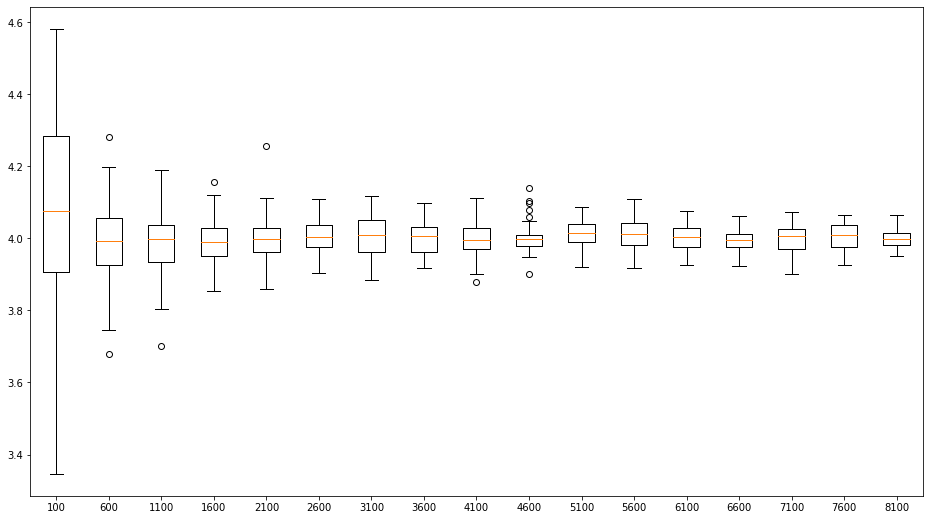

In [ ]:
# Paso 3 : grafiquemos un boxplot para cada tamaño de muestra
plt.figure(figsize= (16,9))
plt.boxplot(samplemeanlist, labels= l)
plt.show()

En la gráfica, podemos ver que a medida que aumenta el tamaño de la muestra, las distribuciones de la media muestral disminuyen y se centran en torno a un valor esperado.

In [ ]:
# Mostramos media y desviacion estandar : para  las muestras de tamaño 100 y de tamaño 8100
len(samplemeanlist)

# muestra de 100 : samplemeanlist[0]
# muestra de 8100 : samplemeanlist[16]
print("""
La media del tamaño de muestra 100 es %f 
la std deltamaño de muestra100 es %f"""
%(np.mean(samplemeanlist[0]),np.std(samplemeanlist[0]))
)

print("""
La media del tamaño de muestra 8100 es %f 
la std deltamaño de muestra 8100 es %f"""
%(np.mean(samplemeanlist[16]),np.std(samplemeanlist[16]))
)


La media del tamaño de muestra 100 es 4.046460 
la std deltamaño de muestra100 es 0.291767

La media del tamaño de muestra 8100 es 4.000171 
la std deltamaño de muestra 8100 es 0.027753


In [ ]:
# Veamos unos histogramas de la muestra de 100 elementos y de la muestra de 8100 elementos


Una última cosa, lo que debe tomar de este notebook es el hecho de que el tamaño de la muestra tiene un efecto enorme en la precisión de las medias de la muestra con los valores esperados. Si su estudio tiene un tamaño de muestra grande, la media de su muestra estará cerca de la media de la población.

# Teorema del limite central 

Referencias :

  * [Teoremas del límite.](https://personal.us.es/bassas/doc/pdf/mmi/temas/Tema11.pdf)
  * [Teorema Central del Límite](https://www.cimat.mx/~jortega/MaterialDidactico/EPyE10/Cap7LaV2.pdf)
  * [Limit theorems](http://www.cse.cuhk.edu.hk/~syzhang/course/Prob17/ch5.pdf)
  * [Law of Large Numbers](https://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/Chapter8.pdf)

Bibliografia :

  * [Probability Through Problems
](https://link.springer.com/book/10.1007/978-0-387-21659-1)

El teorema del límite central es un teorema fundamental de probabilidad y estadística. El teorema describe la distribución de la media de una muestra aleatoria proveniente de una población con varianza finita. Cuando el tamaño de la muestra es lo suficientemente grande, la distribución de las medias sigue aproximadamente una distribución normal. El teorema se aplica independientemente de la forma de la distribución de la población. Muchos procedimientos estadísticos comunes requieren que los datos sean aproximadamente normales. El teorema de límite central le permite aplicar estos procedimientos útiles a poblaciones que son considerablemente no normales. El tamaño que debe tener la muestra depende de la forma de la distribución original. Si la distribución de la población es simétrica, un tamaño de muestra de 5 podría producir una aproximación adecuada. Si la distribución de la población es considerablemente asimétrica, es necesario un tamaño de muestra más grande. Por ejemplo, la distribución de la media puede ser aproximadamente normal si el tamaño de la muestra es mayor que 50. Las siguientes gráficas muestran ejemplos de cómo la distribución afecta el tamaño de la muestra que se necesita.

## Muestras de una población uniforme
Una población que sigue una distribución uniforme es simétrica, pero marcadamente no normal, como lo demuestra el primer histograma. Sin embargo, la distribución de las medias de 1000 muestras de tamaño 5 de esta población es aproximadamente normal debido al teorema del límite central, como lo demuestra el segundo histograma. Este histograma de las medias de las muestras incluye una curva normal superpuesta para ilustrar esta normalidad.

![](https://support.minitab.com/es-mx/minitab/18/central_limit_theorem_images_uniform_1.png) ![](https://support.minitab.com/es-mx/minitab/18/central_limit_theorem_images_uniform_subgroups_2.png)

## Muestras de una población exponencial
Una población que sigue una distribución exponencial es asimétrica y no normal, como lo demuestra el primer histograma. Sin embargo, la distribución de las medias de 1000 muestras de tamaño 50 de esta población es aproximadamente normal debido al teorema del límite central, como lo demuestra el segundo histograma. Este histograma de las medias de las muestras incluye una curva normal superpuesta para ilustrar esta normalidad.

![](https://support.minitab.com/es-mx/minitab/18/central_limit_theorem_images_exponential_3.png)![](https://support.minitab.com/es-mx/minitab/18/central_limit_theorem_images_exponential_subgroups_4.png)

**Usaremos Python para demostrar el teorema con los siguientes pasos**

In [ ]:
# Paso 1
# Cree una población de 1000000 de valores, utilizo una distribución gamma con shape = 2 y scale = 2
# para mostrar que el teorema funciona con una distribución no normal

# construyamos la poblacion 
import numpy as np
shape , scale = 2. , 2.
s = np.random.gamma(shape, scale , size = 1000000)

In [ ]:
# Paso 2
# Tomemos una muestra de la distribución gamma con un tamaño de muestra de 500, calculamos la media y repita
# el paso 1000 veces (este es un número de muestreo). Repito este paso pero aumento el número de muestreos
# hasta que el número sea 50.000 veces.

# lista para almacenar las medias muestrales
meansample = []

numeroMuestras = [1000, 2500, 5000, 10000, 25000, 50000]
samplesize = 500

# para cada muestra de tamaño 1000-50000
for i  in numeroMuestras:
  medias = []
  # para cada muestreo
  for j in range(0,i):
    # muestras de la poblacion
    rc = random.choices(s, k = samplesize)
    medias.append(sum(rc)/len(rc))
  meansample.append(medias)

print("Medias muestrales")
print(meansample)

Medias muestrales
[[4.211562887502517, 3.9095902416613924, 3.880304897837005, 3.9207028487516826, 4.098178677685063, 3.921012623671108, 3.8444374724439863, 4.228881018827557, 3.9802084819745827, 3.9730300996932892, 3.7961951453042775, 3.816242340265098, 4.33584680624214, 4.127006606188518, 4.058581478079949, 4.087785309009444, 3.969183388587793, 3.800399355358648, 4.011451300767118, 4.190046691801019, 3.818855165943339, 4.0471879986044845, 4.095456609162475, 3.965900414324914, 3.9951334699485392, 4.188152859722634, 4.169524039300305, 3.9110037097472174, 4.180074394965787, 4.215140522383321, 3.7468860432372324, 4.195334845517486, 3.983182802461028, 4.011509225543219, 4.165323767659034, 3.893656371220431, 4.110381992171291, 3.9109661346600877, 4.152959866333793, 4.098221814162934, 3.8367372795563277, 4.07219204269727, 4.173270943744987, 4.095729751478206, 3.916386147299491, 3.811485186932199, 3.921407656580663, 3.9837844645764986, 3.9643909787961253, 4.028883958941229, 3.943455456256413,

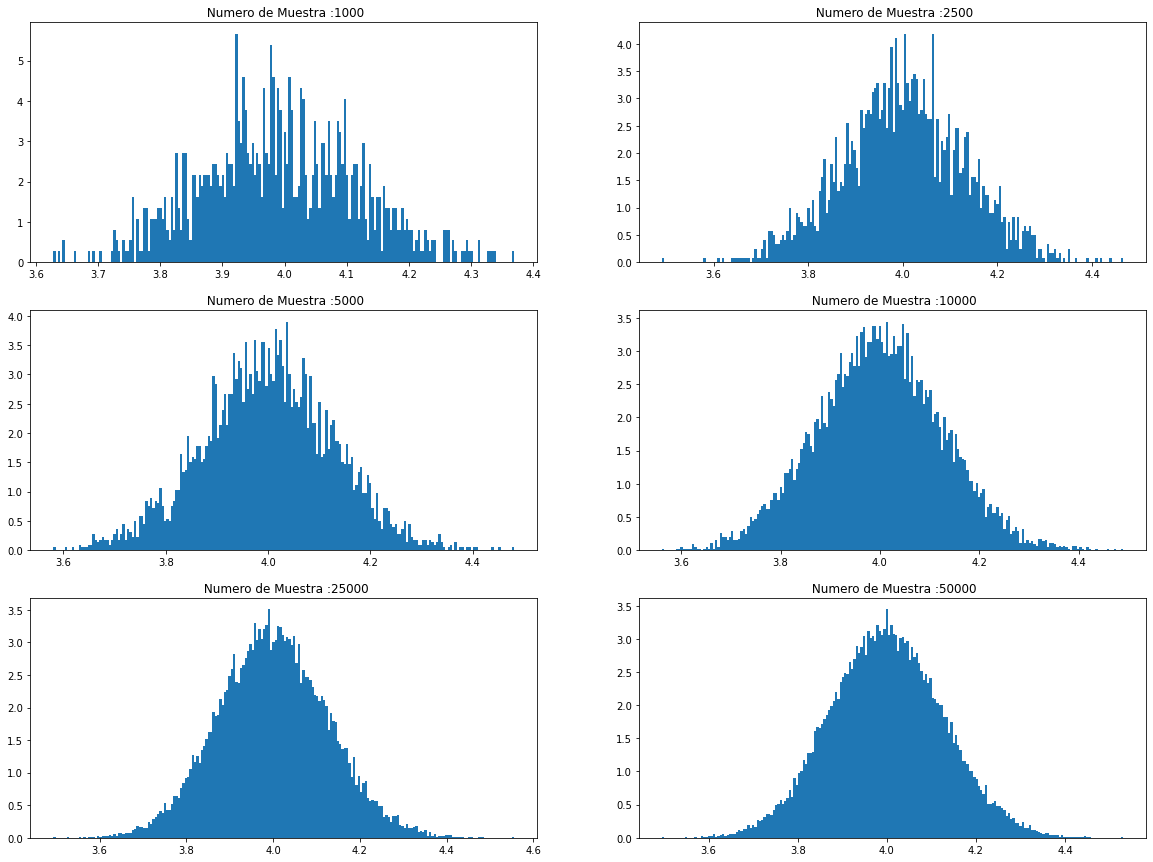

In [ ]:
# paso 3
# graficamos cada media muestral

# construyamos una matriz de graficos 
cols =2
rows = 3 
fig, ax = plt.subplots(rows, cols, figsize=(20,15))
n = 0 
for i in range(0,rows):
  for j in range(0,cols):
    ax[i,j].hist(meansample[n], 200 , density = True )
    ax[i,j].set_title(label= " Numero de Muestra :" + str(numeroMuestras[n]))
    n += 1


Podemos ver en los gráficos que a medida que aumenta el número de muestras, la distribución se vuelve más suave. Este teorema es extremadamente poderoso porque podemos aplicarlo a cualquier población, por lo que si tenemos herramientas para trabajar con distribución normal, podemos usar esa herramienta con la media muestral de cualquier distribución, como calcular la probabilidad usando un área bajo una curva normal.

## Estandarizar/Normalizar la media muestral

Podemos cambiar la distribución de la media de la muestra a una distribución normal estándar restando cada media de la muestra con un valor esperado y dividiéndola por una desviación estándar.

Veamos esto en codigo 

In [ ]:
# paso 1 :
# Usando la distribución del último muestreo
sm = meansample[len(meansample)-1]
len(sm)

50000

In [ ]:
# Paso 2 : 
# Calcule la media y la desviación estándar de la media muestral.
mean = np.mean(sm)
std = np.std(sm)

In [ ]:
# Paso 3 :
# Reste cada valor por la media y divídalo por la desviación estándar, de modo 
# que la media y la desviación estándar de la media de la muestra sea 0, 1 respectivamente.

# lista de media estandarizadas/normalizadas
zn = []

for i in sm:
  zn.append((i -mean)/std)

# verificacion
np.std(zn)

0.9999999999999999

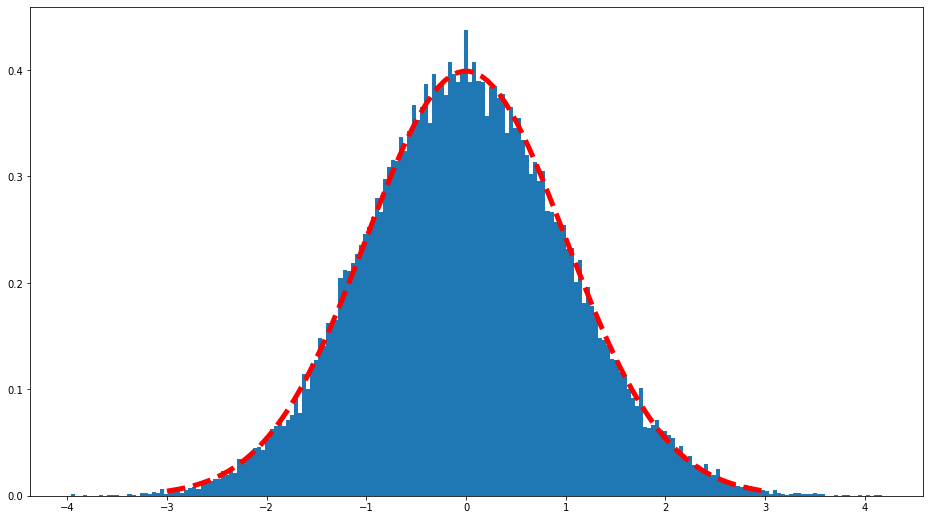

In [ ]:

# paso 4 :
# mostramos el resultado 
plt.figure(figsize= (16,9))
plt.hist(zn, 200,density = True)
# Comparemos nuestro resultados con una distribucion normal estandar 
mu = 0
sigma = 1
x = np.linspace(mu-3*sigma,mu+3*sigma, 100)
import scipy.stats as stats
plt.plot(x , stats.norm.pdf(x,mu, sigma), linewidth =5,color = 'red', ls = '--' )
plt.show()

Una de las razones por las que estandarizamos la media muestral es la complejidad de una función de distribución normal. Tenemos que integrar la función complicada que puede llevar horas hacer, así que en su lugar, estandarizamos la distribución y usamos la tabla Z para encontrar un área debajo de la función.

## Tamaño de la muestra

La regla general del tamaño de la muestra es que debe ser mayor que 30 para que la media de la muestra se distribuya normalmente. Sin embargo, el teorema sigue funcionando si el tamaño de la muestra es inferior a 30 pero la población está distribuida normalmente. Ilustraré lo que sucederá si el tamaño de la muestra es menor que 30, 30 y mayor que 30.


In [ ]:
# paso 1
# Muestra de la misma distribución gamma con 1 tamaño de muestra, calcule la media y 
# repita el paso 25.000 veces. Repito este paso pero aumento el tamaño de la muestra 
# hasta que alcance el tamaño de 1000 muestras.

# lista de medias muestrales
meansample = []
#numerode vecesa samplear
numofsample = 25000

# tamaño de la muestra
samplesize = [1,5, 10,30, 100, 1000]

for i in samplesize:
  eachmeansample = []
  # para  cada muestreo
  for j in range(0, numofsample):
    rc = random.choices(s, k =i )
    #almacenamos esta media muestral
    eachmeansample.append(sum(rc)/len(rc))
  meansample.append(eachmeansample)


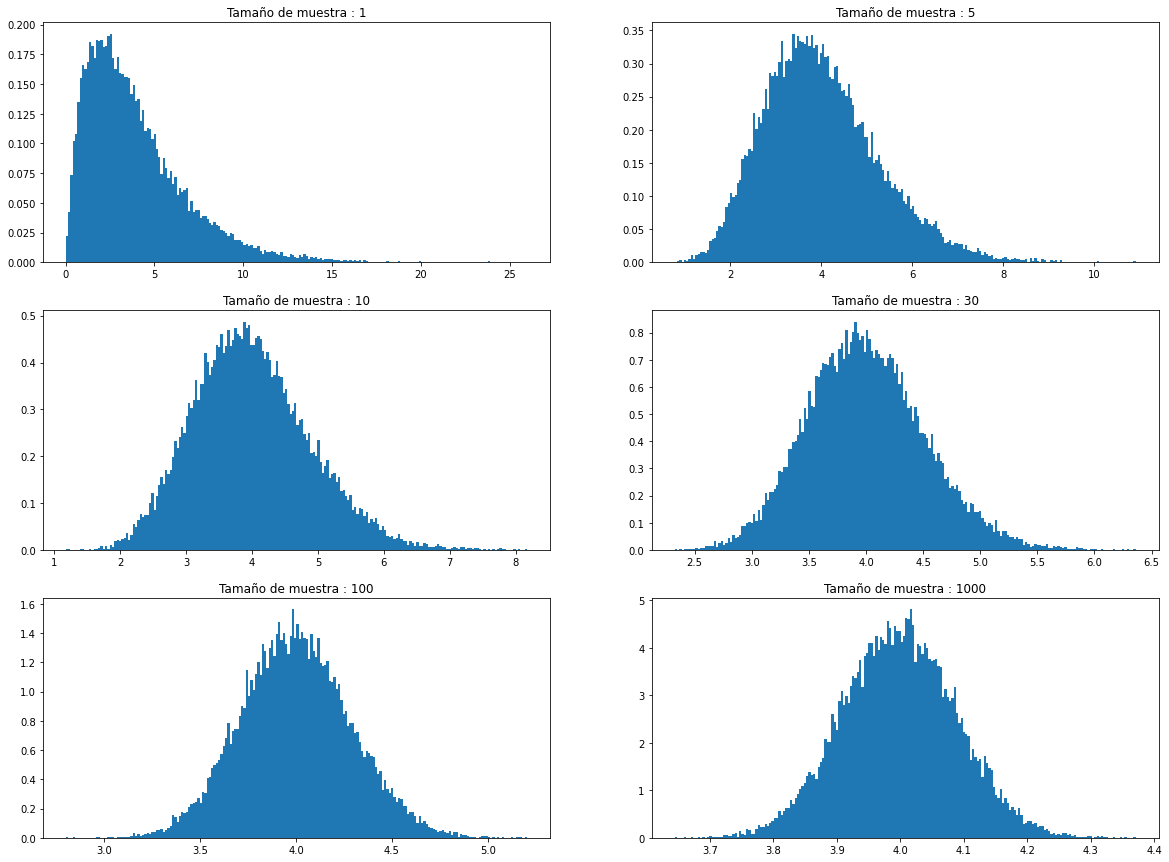

In [ ]:
# paso 2 
# Grafiquemos la media de cada muestra
# creamos una matriz de graficos 
cols =2
rows = 3
fig,ax = plt.subplots(rows, cols, figsize=(20,15))


n = 0 
for i in range(0,rows):
  for j in range(0,cols):
    ax[i,j].hist(meansample[n],200 , density = True)
    ax[i,j].set_title(label = "Tamaño de muestra : " + str(samplesize[n]))
    n = n+1


A partir del gráfico, la distribución del tamaño de la muestra que es menor a 30 no se distribuye normalmente.

La idea es combinar este teorema con la desigualdad de Chebyshev y la ley débil de los números grandes, pero antes de ir allí, veamos el valor esperado y la desviación estándar de las medias muestrales.

## El valor esperado y la desviación estándar de las medias muestrales.

Suponga que X es una variable aleatoria independiente e idéntica distribuida con el valor esperado μ y la desviación estándar σ. Si tomamos una muestra de la muestra Xn, la expectativa y la varianza de X serán las siguientes.

![](https://miro.medium.com/max/437/1*ott3FA9HNRWCATfH-81GbA.jpeg)![](https://miro.medium.com/max/564/1*otR7TN90Sv2zCEQGuQjj-Q.jpeg)

Donde n es el tamaño de la muestra, n = 10 significa que usamos 10 datos y la media de la muestra es un promedio de 10 datos, el valor esperado y la varianza se pueden calcular como se indicó anteriormente.




In [ ]:
## expect value of sample
sample = meansample[5]
#sample

# valor esperado de la muestra
print(np.mean(sample))
#Valor esperadode la poblacion
print(shape*scale)

print("Varianza")
print("muestra :" , np.std(sample))
print("Poblacion :" , shape/scale**2)


3.998612252067555
4.0
Varianza
muestra : 0.08995547047591937
Poblacion : 0.5


Este es el resultado del código anterior. Si dividimos la desviación estándar de la población por la raíz cuadrada de n, el resultado estará cerca de una desviación estándar de la media muestral.


Sin embargo, se siente un poco contradictorio porque cómo una muestra puede tener una expectativa y una variación, es solo un número. Bueno, piense en esto, suponga que le pido que muestre la altura de un estudiante en una escuela, tendrá que golpear a todos los salones y elegir 1 estudiante en el salón. Antes de entrar al salón, ¿cuál es su expectativa de la altura del estudiante que elegirá? No lo sabes, ¿verdad? Entonces, ¿qué pasa si les digo que la altura promedio de los estudiantes en esta escuela es de 5 pies con una variación de 4 pulgadas? Ahora, su expectativa de la altura de un estudiante antes de elegir uno de ellos debe ser de 5 pies con una variación de 4 pulgadas. Si elige 10 estudiantes, la expectativa de la altura de esos estudiantes sería la suma de las expectativas de cada estudiante, que es lo mismo con el valor 5 pies, dividido por el número de estudiantes. Por lo tanto, intente pensar en una muestra como una variable aleatoria, no como un número.

Otra cosa que quiero mencionar es, según la fórmula, cuando el tamaño de la muestra aumenta, la varianza de la media de la muestra será menor, por lo que la varianza de la media de la muestra dependerá del tamaño de la muestra. Si la muestra es lo suficientemente grande, la media muestral estará cerca de su expectativa.

## Convergencia en medias muestrales

La desigualdad de Chebyshev funciona con una amplia clase de distribución de probabilidad y también funciona con una distribución normal. Podemos cambiar la desigualdad para trabajar con la media muestral de la siguiente manera.

![](https://miro.medium.com/max/645/1*hQWDcuhgeQn0QlRGPgF0Hg.jpeg)

Donde X barra es una media de la muestra, μ son los valores esperados de una media de la muestra, ε es el margen de error que es mayor que 0, σ es una desviación estándar de la población y n es un tamaño de muestra.

Usando la ley débil de números más grandes y esta fórmula, si el tamaño de la muestra llega al infinito, la probabilidad de que la diferencia entre la media de la muestra y el valor esperado sea mayor que un margen de error converge a cero.

**Usaré Python para mostrar el hecho de que a medida que aumenta el tamaño de la muestra, la media de la muestra se acerca más al valor esperado en el siguiente paso.**

In [ ]:
# paso 1 :
#Utilice la misma distribución gamma para la población
shape = 2.0 
scale= 2.0
s= np.random.gamma(shape, scale , 1000000)





In [ ]:
# Paso 2 :
# Muestree de la población usando un tamaño de muestra de 10 a 20,000 paso por 20, luego calcule la diferencia entre
# la media de la muestra y la media de la población.

# media de la poblacion
mu = shape*scale

# lista para el tamaño de las muestras : 10-20000
samplesize = []

# lista para almacenar esas diferencias : media de la muestra y la media de la poblacion (variable mu)
diflist = []

# trabajemos sobre cada tamaño de muestra
for n in range(10, 20001, 20):
  # generemos la muestra de tamaño n
  rs = random.choices(s,k=n)
  # Calculemos la media de esta muestra
  mean = sum(rs)/len(rs)
  # guardemos las diferencias : mean-mu
  diflist.append(mean-mu)
  samplesize.append(n)

print(diflist)


[0.9524340749287292, -0.6336776776875306, 0.2952318989498828, 0.3143866967547977, -0.027479306485932664, -0.016700916054072756, -0.4784196158335421, 0.26393817327044733, -0.31772501239594764, -0.27033267745773637, -0.21414110522974994, 0.08496352829214882, 0.20046012465688978, -0.14522950854777816, -0.1368791963100584, 0.025260415667069935, -0.008706179869768516, -0.16852018448728012, -0.36806980018188096, 0.010384340716047546, 0.04390570925388726, -0.06025347946096904, 0.15735025715483086, -0.036016959196721654, -0.16324721998452674, -0.029276129664111306, 0.14620637550116555, -0.012653025049174982, -0.04048885815462677, -0.033457462756899314, -0.19927616589900898, 0.003855601151925292, -0.031999052628783, -0.03589618678257933, -0.10292638559348743, 0.15390870170498427, 0.12288746468048561, -0.02016563588506015, -0.09907358342280981, 0.02579117584369861, 0.11617422819722734, -0.05889473140377577, -0.02742793679160105, -0.048734109861076735, 0.06785775067506972, -0.11218907042442927, -

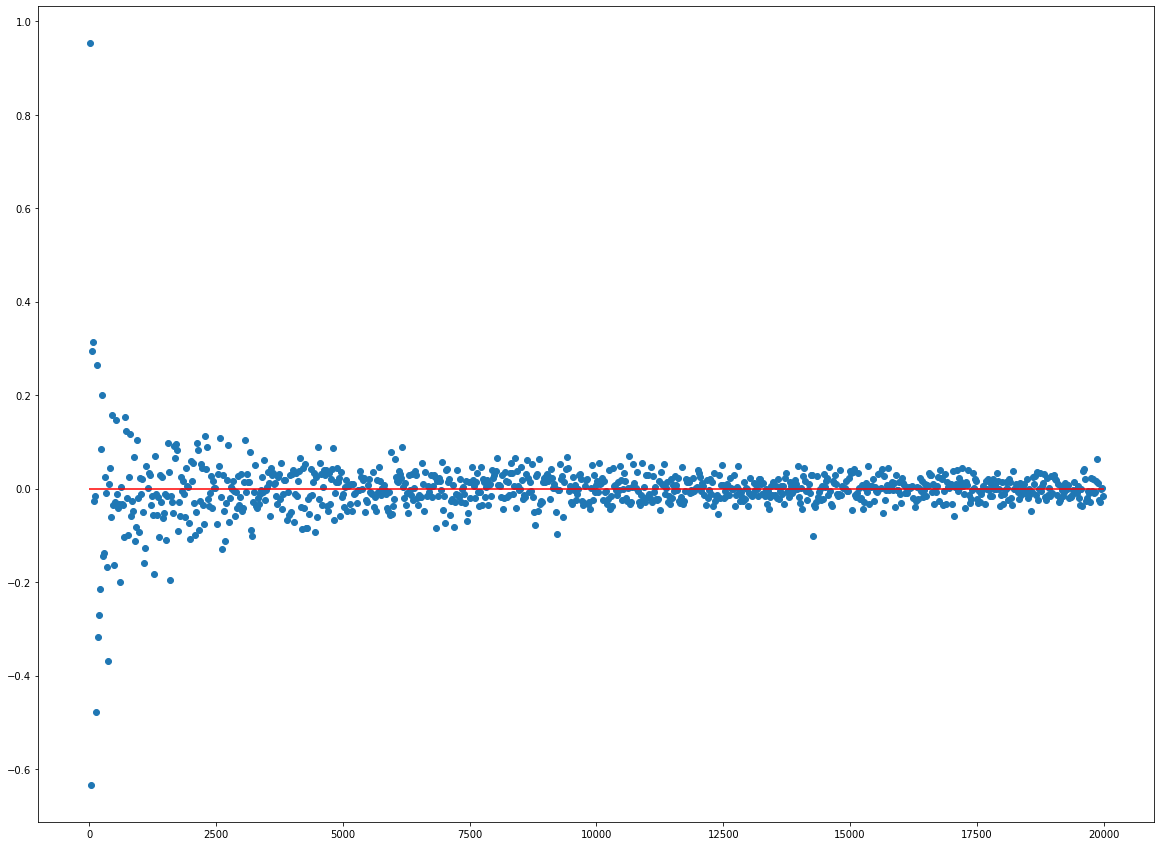

In [ ]:
# Paso 3 
# grafiquemos estas diferencias
plt.figure(figsize = (20,15))
# grafiquemos cada una de las diferencias
plt.scatter(samplesize, diflist, marker = 'o')
plt.hlines(y=0 ,xmin = 0, xmax= 20000,colors= 'red')
plt.show()

Podemos ver que a medida que aumenta el tamaño de la muestra, la diferencia disminuye.

También podemos usar la fórmula para encontrar un tamaño de muestra que pueda mantener un error de la media de la muestra dentro de un rango. Por ejemplo, si queremos que nuestra muestra tenga un error del 1% con una probabilidad del 95%, podemos establecer una desigualdad para que sea así.

![](https://miro.medium.com/max/474/1*QqtaSV0ii9npUSXSPoSAeQ.jpeg)

Trazaré otro gráfico para mostrar que la probabilidad de que la diferencia de las medias muestrales y la expectativa sea mayor de que el error disminuya a medida que aumenta el tamaño de la muestra.




In [ ]:
# PAso 1
# Utilice la misma distribución gamma para la  población y establezca el error en 0,05.

# poblacion 
s 

# margen de error 
epsilon = 0.05


In [ ]:
# Paso2 :
# Muestre de la población 100 veces usando un tamaño de muestra de 100 a 10100, paso por 500, luego
# cuente la muestra que tiene las diferencias de valor medio y esperado mayores que el error.

# lista de probabilidades de cada muestra
proberror = []

# guardemos el tamaño de las muestras
samplesize = []

for n in range(100,10101, 500):
  # iniciar un contador : para las muestras  que salgandel margen de error
  c = 0
  for i in range(0,100):
    # muestra de tamaño n 
    rs = random.choices(s,k =n )
    # calculemos la media del a muestra
    mean = sum(rs)/len(rs)
    # estoy interesado en las muestras cuya diferencia con la media poblacional este por encima del margen de error
    if abs(mean-mu) > epsilon:
      c = c+1
    # calculemos la  probabilidad
    proberror.append(c/100)
    # almacenemos el tamaño de la muestra (para los graficos)
    samplesize.append(n)










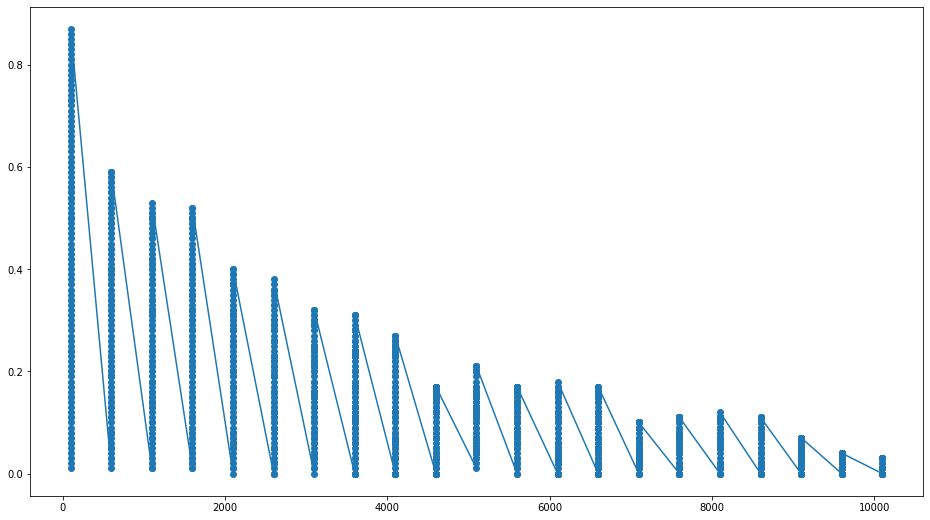

In [ ]:
# paso 3 :
# graficar las probabilidades
plt.figure(figsize =(16,9))
plt.plot(samplesize, proberror, marker ='o')
plt.show()

Las cosas que debes resaltar de este notebook son:

  * La media de la muestra será una distribución normal independientemente de la media de la población.

  * A medida que aumenta el tamaño de la muestra, la varianza de la media muestral se reduce.

  * Por lo tanto, la probabilidad de que la media de la muestra esté lejos de la expectativa también disminuye a medida que aumenta el tamaño de la muestra.

